## Manipulation de données avec Python et Numpy

    Alexandre Gramfort : alexandre.gramfort@inria.fr

L'objectif de ce notebook est la prise en main de Python et Numpy en manipulant un célèbre jeu de données de machine learning.

Les données sont fournies par la librarie Python Scikit-Learn.

Vous travaillerez sur des données de chiffres manuscrits pour la classification (données `digits`)

# I - Manipulation et visualisation des *digits*

## Imports et intialisation

In [1]:
%matplotlib inline                      

import numpy as np                      # charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques

## Description du jeu de données

On charge le jeu de données *digits* disponible dans le package scikit-learn (nom d'import sklearn). Ce jeu de données contient des images de chiffres numérisés.

In [2]:
# Chargement des données disponible dans le package sklearn
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [3]:
X.shape # 1797 images de 64 pixels

(1797, 64)

In [4]:
y.shape # 1797 codage (reconnaissance de nombres manuscrits)

(1797,)

In [5]:
print("Nombre de pixels :      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y))))

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10


In [6]:
# Choix d'une observation quelconque de la base
idx_to_test = 15

print("Affichage d'une ligne de la matrice / image:")
print(X[idx_to_test, :]) # 64 intensités de gris qui représentent un "5"
print("Affichage de la classe / chiffre associé:")
print(y[idx_to_test])

Affichage d'une ligne de la matrice / image:
[ 0.  5. 12. 13. 16. 16.  2.  0.  0. 11. 16. 15.  8.  4.  0.  0.  0.  8.
 14. 11.  1.  0.  0.  0.  0.  8. 16. 16. 14.  0.  0.  0.  0.  1.  6.  6.
 16.  0.  0.  0.  0.  0.  0.  5. 16.  3.  0.  0.  0.  1.  5. 15. 13.  0.
  0.  0.  0.  4. 15. 16.  2.  0.  0.  0.]
Affichage de la classe / chiffre associé:
5


<div class="alert alert-success">
    <b>EXERCISE:</b>
     <ul>
      <li>Quel est le dtype de X? y?</li>
      <li>Faites varier de `idx_to_test`. Sans afficher y[idx_to_test] arrivez-vous à reconnaitre le chiffre représenté?</li>
    </ul>
</div>

In [7]:
X.dtype

dtype('float64')

In [8]:
y.dtype

dtype('int64')

In [9]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Visualisation des observations:

Les images scannées sont de taille  8 x 8 et comportent donc 64 pixels chacune. Elles sont stockées sous la forme de vecteurs ligne, qu'il faut remettre dans un ordre lisible pour les identifier. L'affichage graphique est proposé avec les commandes qui suivent. On utilise la commande `np.reshape` pour passer d'un array 1d à un array 2d de 8x8 valeurs.

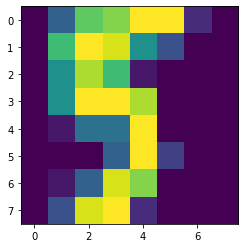

In [11]:
# Utilisation de la fonction imshow pour l'affichage de l'image numéro idx_to_test:
plt.imshow(np.reshape(X[idx_to_test, :], (8, 8))); # afficher une image

In [12]:
#plt.imshow?

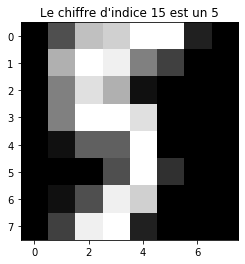

In [13]:
# Amélioration de la visualisation (niveau de gris) et de la légende:
plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)),
           cmap='gray', aspect='equal', interpolation='nearest')

# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title(u'Le chiffre d\'indice %s est un %s' % (idx_to_test, y[idx_to_test]));

<div class="alert alert-success">
    <b>EXERCISE:</b>:
     <ul>
      <li>Afficher un pixel sur 2 dans l'image d'avant</li>
      <li>Afficher l'image ci-dessus après avoir enlevé un pixel de chaque bord?</li>
      <li>Afficher l'histogramme des valeurs des pixels (fonction `plt.hist`)</li>
    </ul>
</div>

In [14]:
print(X[idx_to_test, :])

[ 0.  5. 12. 13. 16. 16.  2.  0.  0. 11. 16. 15.  8.  4.  0.  0.  0.  8.
 14. 11.  1.  0.  0.  0.  0.  8. 16. 16. 14.  0.  0.  0.  0.  1.  6.  6.
 16.  0.  0.  0.  0.  0.  0.  5. 16.  3.  0.  0.  0.  1.  5. 15. 13.  0.
  0.  0.  0.  4. 15. 16.  2.  0.  0.  0.]


In [15]:
image=np.reshape(X[idx_to_test, :], (8, 8))
image_sans_bord=image[1:-1,1:-1] 

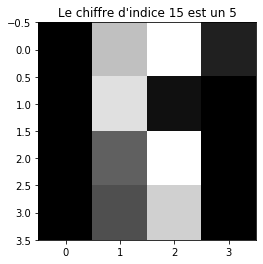

In [16]:
# Selectionner un pixel sur 2
# ---------------------------
image=np.reshape(X[idx_to_test, :], (8, 8))
image_sur2=image[::2,::2] # Toutes les images, mais un pixel sur 2 pour les colonnes et lignes
plt.imshow(image_sur2,
           cmap='gray', aspect='equal', interpolation='nearest')

# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title(u'Le chiffre d\'indice %s est un %s' % (idx_to_test, y[idx_to_test]));

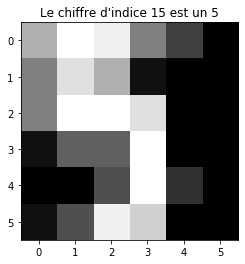

In [17]:
# Enlever un pixel de chaque bord
# ---------------------------
image_sans_bord=image[1:-1,1:-1] 
plt.imshow(image_sans_bord,
           cmap='gray', aspect='equal', interpolation='nearest')

# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title(u'Le chiffre d\'indice %s est un %s' % (idx_to_test, y[idx_to_test]));

(array([33.,  3.,  2.,  5.,  0.,  3.,  2.,  1.,  4., 11.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

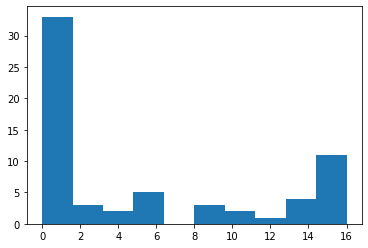

In [18]:
#Afficher l'histogramme des valeurs des pixels (fonction `plt.hist`)
plt.hist(X[idx_to_test, :])

In [19]:
un_vecteur=np.reshape(X, (X.shape[0]*X.shape[1],))
un_vecteur=np.reshape(X, (X.size,))
un_vecteur=np.ravel(X) # mettre à plat un tableau

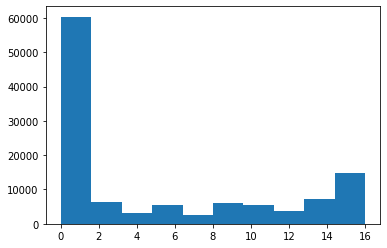

In [20]:
#Afficher l'histogramme des valeurs des pixels (fonction `plt.hist`)
_=plt.hist(un_vecteur)


## Statistiques élementaires :
Pour mieux comprendre la base de données on va s'intéresser à quelques statistiques. 
On commence par calculer les moyennes et variances par classes pour chacun des chiffres. La moyenne par classe se visualise comme une image qui est une représentantion moyenne pour chaque chiffre de zéro à neuf. Idem pour la variance, ce qui permet alors de voir les parties avec les plus grandes variations entre les membres d'une même classe.


In [21]:
classes_list = np.unique(y).astype(int)
print(u"Liste des classes en présence: ", classes_list)

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


<div class="alert alert-success">
    <b>EXERCISE:</b>:
     <ul>
      <li>Calculer un représentant moyen du chiffre 0 (l'image qui en pixel i,j contient la valeur moyenne du pixel i,j parmis tous les 0)</li>
      <li>Avec une boucle `for` calculer le représentant moyen pour chaque chiffre</li>
      <li>Faire la même chose en remplaçant la moyenne par l'écart type</li>
      <li>Afficher toutes les images sur une grille à l'aide de la fonction `plt.subplots`</li>
    </ul>
</div>


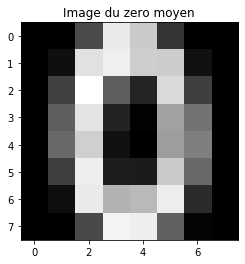

In [22]:
# Calculer un représentant moyen du chiffre 0 (l'image qui en pixel i,j contient la valeur moyenne du pixel i,j parmis tous les 0)

# A quel endroit sont les zeros ?
index_0= y==0
index_0

# Calcul de la moyenne de ces images là
moyenne_0=np.mean(X[index_0],axis=0)

plt.imshow(np.reshape(moyenne_0, (8, 8)),
           cmap='gray', aspect='equal', interpolation='nearest')
# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title('Image du zero moyen');

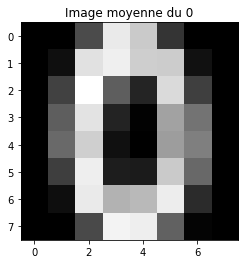

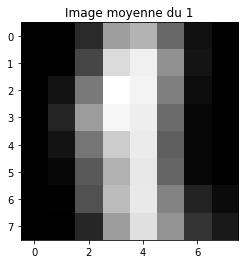

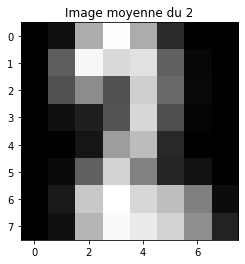

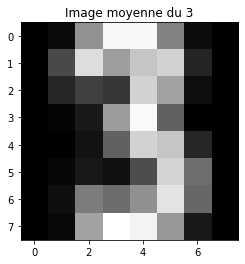

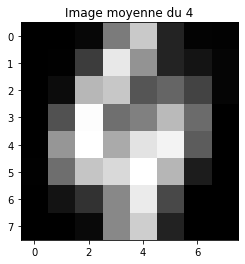

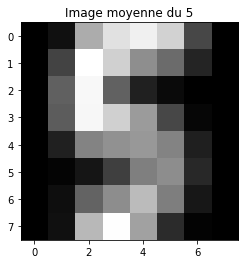

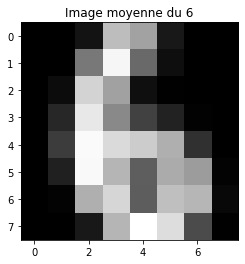

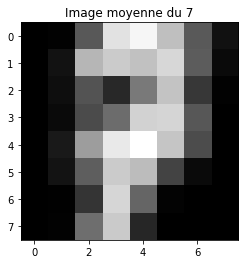

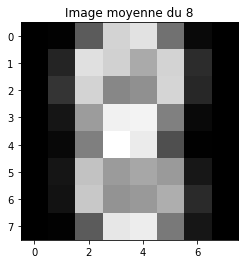

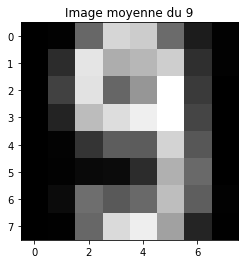

In [23]:
# Avec une boucle `for` calculer le représentant moyen pour chaque chiffre
def get_mean_image(X,y,idx):
    index_of_idx= y==idx
    # Calcul de la moyenne de cette images là
    return(np.mean(X[index_of_idx],axis=0))

for i in range(10):
    moyenne_image=get_mean_image(X,y,i) 
    plt.figure()
    plt.imshow(np.reshape(moyenne_image, (8, 8)),
           cmap='gray', aspect='equal', interpolation='nearest')
    # Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
    plt.title(u'Image moyenne du %d'%i);

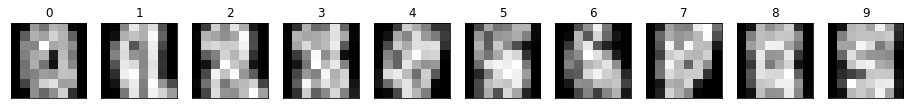

In [24]:
# Avec une boucle `for` calculer le représentant moyen pour chaque chiffre
def get_std_image(X,y,idx):
    index_of_idx= y==idx
    # Calcul de la moyenne de cette images là
    return(np.std(X[index_of_idx],axis=0))

fig,axes=plt.subplots(1,10,figsize=(16,16))

for i in range(10):
    moyenne_image=get_std_image(X,y,i)       
    axes[i].imshow(np.reshape(moyenne_image, (8, 8)),
           cmap='gray', aspect='equal', interpolation='nearest')
    # Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(u'%d'%i);

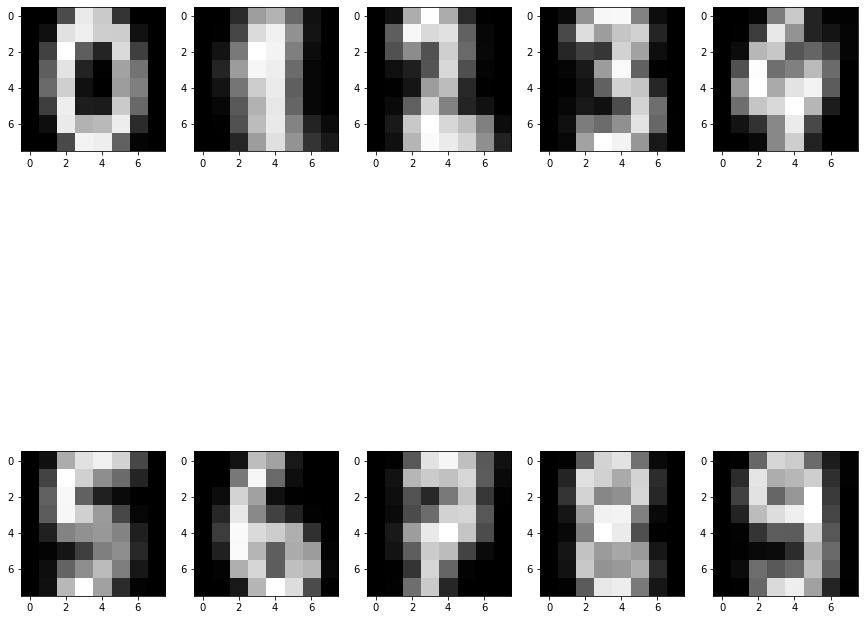

In [25]:
# Avec une boucle `for` calculer le représentant moyen pour chaque chiffre
def get_mean_image(X,y,idx):
    index_of_idx= y==idx
    # Calcul de la moyenne de cette images là
    return(np.mean(X[index_of_idx],axis=0))

fig,axes=plt.subplots(2,5,figsize=(15,15))

for ligne in range(2):
    for col in range(5):
        i=ligne*5+col
        moyenne_image=get_mean_image(X,y,i)

        axes[ligne,col].imshow(np.reshape(moyenne_image, (8, 8)),
               cmap='gray', aspect='equal', interpolation='nearest')
        # Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
        #plt.title(u'Image moyenne du %d'%i);

In [26]:
#plt.subplots?

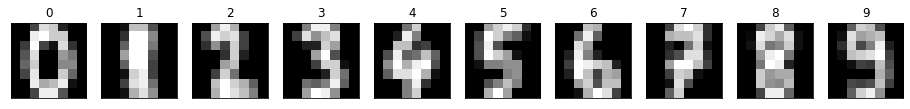

In [27]:
# Avec une boucle `for` calculer le représentant moyen pour chaque chiffre
def get_median_image(X,y,idx):
    index_of_idx= y==idx
    # Calcul de la moyenne de cette images là
    return(np.median(X[index_of_idx],axis=0))

fig,axes=plt.subplots(1,10,figsize=(16,16))

for i in range(10):
    moyenne_image=get_median_image(X,y,i)       
    axes[i].imshow(np.reshape(moyenne_image, (8, 8)),
           cmap='gray', aspect='equal', interpolation='nearest')
    # Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(u'%d'%i);

# II - Classification par plus proche centroide

Le but de cette partie est de vous faire implémenter votre propre classifieur
basé sur une idée très simple. Pour un nouveau chiffre, on prédit la classe
dont le chiffre moyen est le plus proche.

<div class="alert alert-success">
    <b>EXERCISE:</b>:
     <ul>
      <li>Partager la base de données en 2. On notera la première partie X_train, y_train et la deuxième partie X_test et y_test.</li>
      <li>Pour chaque chiffre calculer sur l'ensemble de train le chiffre moyen. On notera la variable contenant les moyennes `centroids_train`</li>
      <li>Pour chaque chiffre de l'ensemble de test, calculer le centroide le plus proche. Vous évaluerez si le chiffre ainsi obtenu correspond au vrai chiffre et en déduirez une estimation du pourcentage de bonnes prédictions.</li>
    </ul>
</div>

In [28]:
import math as m
n_samples, n_features = X.shape

n_samples_train = n_samples // 2
#n_samples_train=m.ceil(n_samples * 0.8)

# X_train = X[...]
X_train=X[:n_samples_train,:]
# y_train = y[...]
y_train = y[:n_samples_train]

# X_test = X[...]
X_test = X[n_samples_train:,:]
# y_test = y[...]
y_test = y[n_samples_train:]

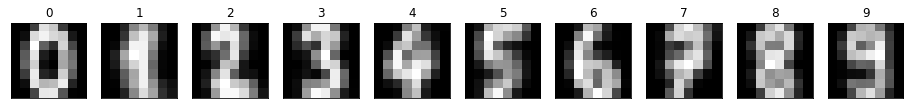

In [29]:
# Calculer le modèle d'apprentissage :
centroids_train=np.zeros((10,64),dtype=float)

def get_mean_image(X,y,idx):
    index_of_idx= y==idx
    # Calcul de la moyenne de cette images là
    return(np.mean(X[index_of_idx],axis=0))
def get_median_image(X,y,idx):
    index_of_idx= y==idx
    # Calcul de la moyenne de cette images là
    return(np.median(X[index_of_idx],axis=0))

# Calculer l'image moyenne et l'afficher
fig,axes=plt.subplots(1,10,figsize=(16,16))
for i in range(10):
    centroids_train[i]=get_mean_image(X_train,y_train,i) 
    axes[i].imshow(np.reshape(centroids_train[i], (8, 8)),
           cmap='gray', aspect='equal', interpolation='nearest')
    # Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(u'%d'%i);

In [30]:
import math as m

def distance_image(image1,image2):
    distance=np.sqrt(np.sum((image1-image2)**2))
    # opération sur les vecteurs
    return(distance)

def predict(centroids_train,test_array):
    pred_array=np.zeros(test_array.shape[0],dtype=int)
    for elem in range(test_array.shape[0]):
        distance_sel=9999999999
        pred_sel=99;
        for i in range(centroids_train.shape[0]):
            distance=distance_image(np.ravel(centroids_train[i,:]),np.ravel(test_array[elem]))
            if distance < distance_sel:
                pred_sel=i
                distance_sel=distance
        pred_array[elem]=pred_sel
    return(pred_array)

resultats= predict(centroids_train,X_test) == y_test        
print("Taux de reussite=",np.mean(resultats)*100)

Taux de reussite= 87.54171301446051


In [31]:

# --------------------
# Correction
# --------------------
n_samples, n_features = X.shape

n_samples_train = n_samples // 2

X_train = X[:n_samples_train]
y_train = y[:n_samples_train]

X_test = X[n_samples_train:]
y_test = y[n_samples_train:]

# Learning / Fitting
centroids_train = np.zeros((10, 64))
for i in range(10):
    centroids_train[i, :] = np.mean(X_train[y_train == i, :], axis=0)

# Prediction
dist = np.zeros((len(X_test), 10)) # en ligne le numéro d'image à tester, en colonne les distances pour les 10 cas
for j in range(len(X_test)):
    x = X_test[j, :] # L'image à prédire
    for i in range(10):
        dist[j, i] = np.sqrt(np.sum((x - centroids_train[i])**2))

y_pred = np.argmin(dist, axis=1) # argmin() : Quel est l'indice du minimum, suivant les colonnes
acc = np.mean(y_pred == y_test)
acc

0.8754171301446051

In [32]:
# En écrivant cela en objet :
from sklearn.base import BaseEstimator, ClassifierMixin

class MyClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        n_classes = len(np.unique(y))
        n_features = X.shape[1]
        centroids_train = np.zeros((n_classes, n_features))
        for i in range(n_classes):
            centroids_train[i, :] = \
                np.mean(X[y == i, :], axis=0)
        self.centroids_train_ = centroids_train
        return self

    def predict(self, X):
        n_classes = len(self.centroids_train_)
        dist = np.zeros((len(X), n_classes))
        for j in range(len(X)):
            x = X[j, :]
            for i in range(n_classes):
                dist[j, i] = \
                    np.sqrt(np.sum((x - self.centroids_train_[i])**2))

        y_pred = np.argmin(dist, axis=1)
        return y_pred

In [33]:
classifier = MyClassifier()
classifier.fit(X_train, y_train)  # learn / fit / apprend
y_pred = classifier.predict(X_test)  # predict
acc = classifier.score(X_test, y_test)  # score
acc

0.8754171301446051

In [34]:
# -----------------
# sklearn a déjà ça
#------------------
# Voir ce que sklearn nous donne
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8754171301446051

In [35]:
# aller voir le code :
#NearestCentroid??


In [36]:
# Façons de séparer le jeux de Train et celui de Test
from sklearn.model_selection import train_test_split

# Random split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
clf.fit(X_train, y_train).score(X_test,y_test)

# on obtient un %age de score qui varient.
# En jouant le score plusieurs fois, on obtient plusieurs valeurs et on peut en calculer la moyenne et l'écart type.


0.8954393770856507

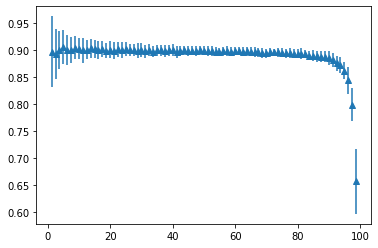

In [41]:
import matplotlib.pyplot as plt
combien_tests=100
results=np.zeros(combien_tests)
par_combien=80
results_histo=np.zeros((par_combien+1,3))

for pct in range(1,par_combien):
    #print(pct)
    for i in range(combien_tests):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=pct/par_combien)
        results[i]=clf.fit(X_train, y_train).score(X_test,y_test)
    results_histo[pct,0]=pct/par_combien*100
    results_histo[pct,1]=np.mean(results)
    results_histo[pct,2]=np.std(results)
    #print("moyenne=",np.mean(results),"standard dev=",np.std(results))

plt.errorbar(results_histo[1:-1,0], results_histo[1:-1,1]
                 , results_histo[1:-1,2], linestyle='None', marker='^')
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X,y,cv=10)
# Ici, on rejout le score 10 fois, et on prend la moyenne

print("moyenne=",np.mean(scores),"standard dev=",np.std(scores))


moyenne= 0.8836101717889818 standard dev= 0.04112678822301056


In [42]:
#results_histo